# 1. Data Loading & Understanding

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

C:\Users\babli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import Bitcoin data

bit_usd = pd.read_csv('BTC-USD.csv')
bit_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
bit_usd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


In [4]:
# Print shape

bit_usd.shape

(2747, 7)

In [5]:
# Print Info

bit_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [6]:
# Describe data

bit_usd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
# Finding missing values

bit_usd.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# Chanding data type of date from object to date

bit_usd['Date'] = pd.to_datetime(bit_usd.Date, infer_datetime_format=True)
bit_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2747 non-null   datetime64[ns]
 1   Open       2747 non-null   float64       
 2   High       2747 non-null   float64       
 3   Low        2747 non-null   float64       
 4   Close      2747 non-null   float64       
 5   Adj Close  2747 non-null   float64       
 6   Volume     2747 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 150.4 KB


### From the above observation, noted that
    1. There are no Nulls or missing values in the final data set.

    2. Data frame has 2747 rows and 7 columns.

    3. Data types are in datetime, int & float types

# 2. Data Exploration & Analysis 

In [9]:
# Converting the Date column into index for exploring the data

bit_usd = bit_usd.set_index('Date')
bit_usd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


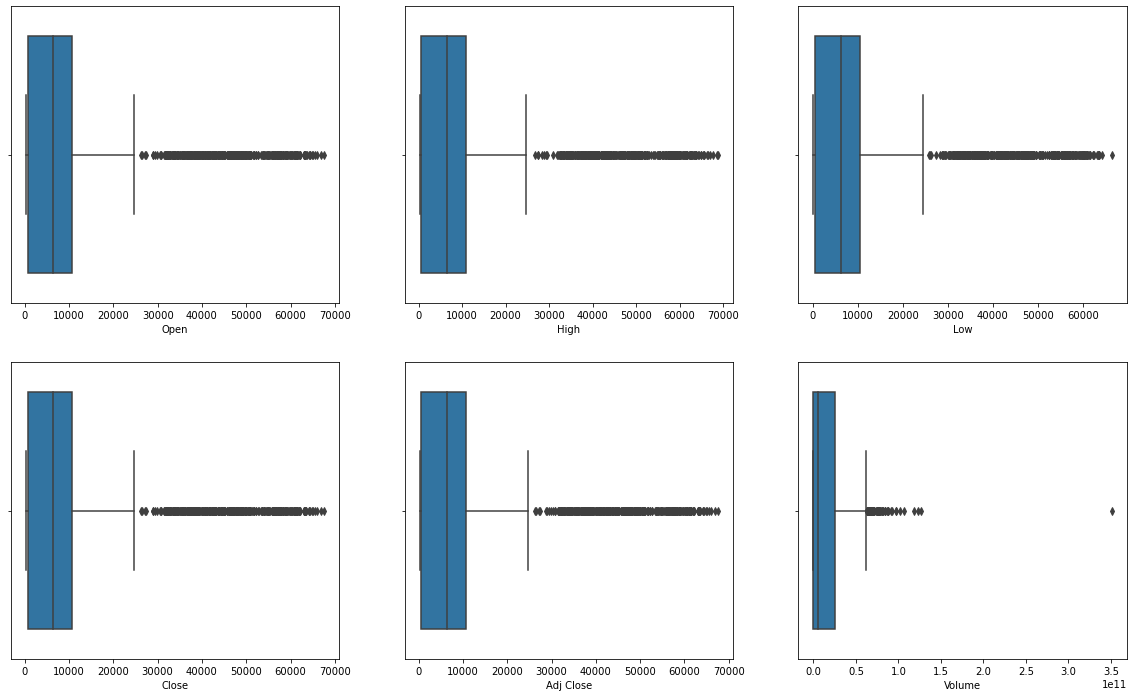

In [10]:
# Ploting box plot of all columns

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(bit_usd.Open)
plt.subplot(2,3,2)
sns.boxplot(bit_usd.High)
plt.subplot(2,3,3)
sns.boxplot(bit_usd.Low)
plt.subplot(2,3,4)
sns.boxplot(bit_usd.Close)
plt.subplot(2,3,5)
sns.boxplot(bit_usd['Adj Close'])
plt.subplot(2,3,6)
sns.boxplot(bit_usd.Volume)
plt.show()

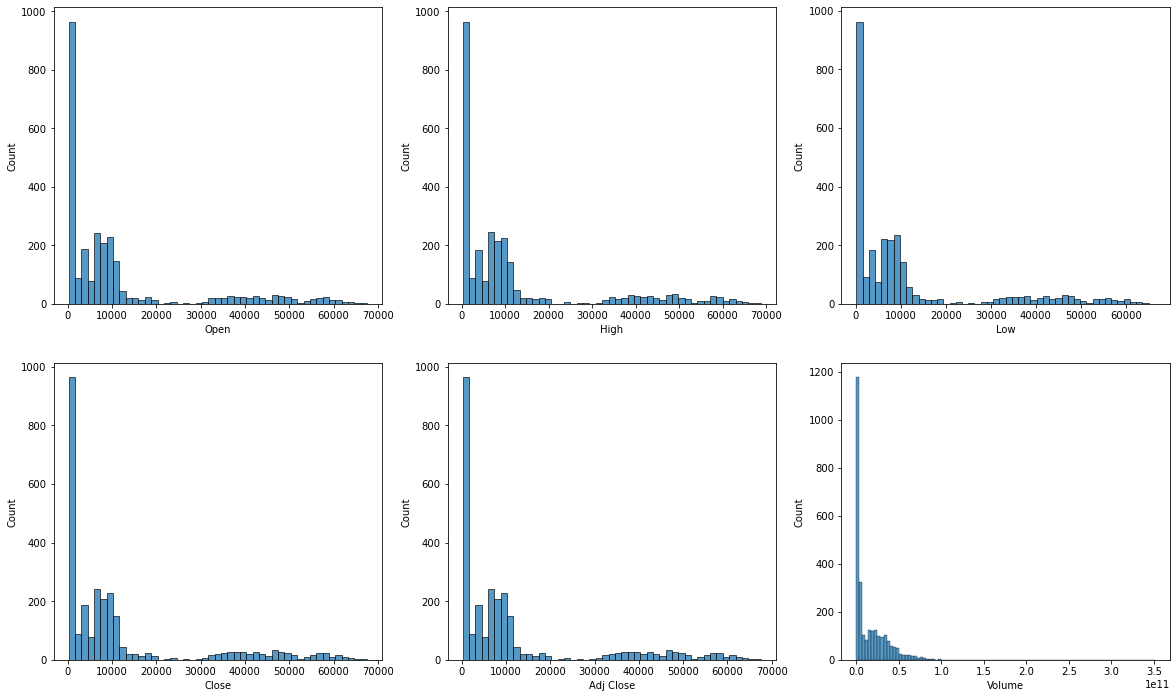

In [11]:
# Ploting hist plot of all columns

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.histplot(bit_usd.Open)
plt.subplot(2,3,2)
sns.histplot(bit_usd.High)
plt.subplot(2,3,3)
sns.histplot(bit_usd.Low)
plt.subplot(2,3,4)
sns.histplot(bit_usd.Close)
plt.subplot(2,3,5)
sns.histplot(bit_usd['Adj Close'])
plt.subplot(2,3,6)
sns.histplot(bit_usd.Volume)
plt.show()

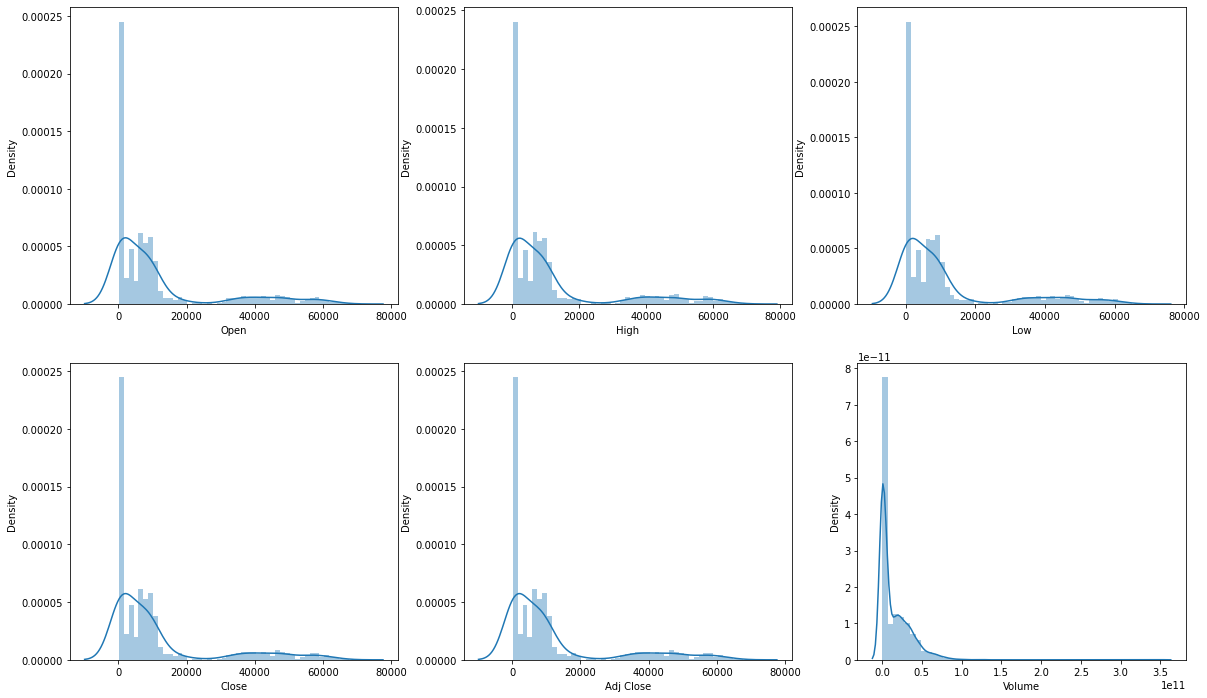

In [12]:
# Ploting histogram of all columns

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.distplot(bit_usd.Open)
plt.subplot(2,3,2)
sns.distplot(bit_usd.High)
plt.subplot(2,3,3)
sns.distplot(bit_usd.Low)
plt.subplot(2,3,4)
sns.distplot(bit_usd.Close)
plt.subplot(2,3,5)
sns.distplot(bit_usd['Adj Close'])
plt.subplot(2,3,6)
sns.distplot(bit_usd.Volume)
plt.show()

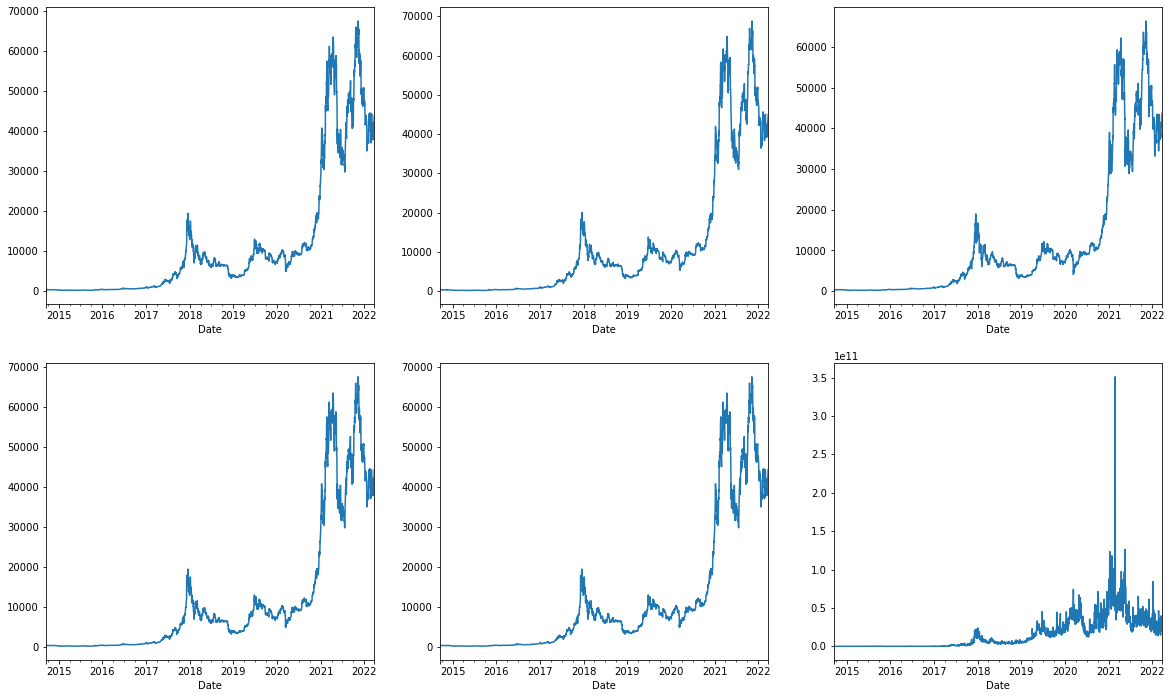

In [13]:
# Ploting line chart of all columns

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
bit_usd.Open.plot.line()
plt.subplot(2,3,2)
bit_usd.High.plot.line()
plt.subplot(2,3,3)
bit_usd.Low.plot.line()
plt.subplot(2,3,4)
bit_usd.Close.plot.line()
plt.subplot(2,3,5)
(bit_usd['Adj Close']).plot.line()
plt.subplot(2,3,6)
bit_usd.Volume.plot.line()
plt.show()

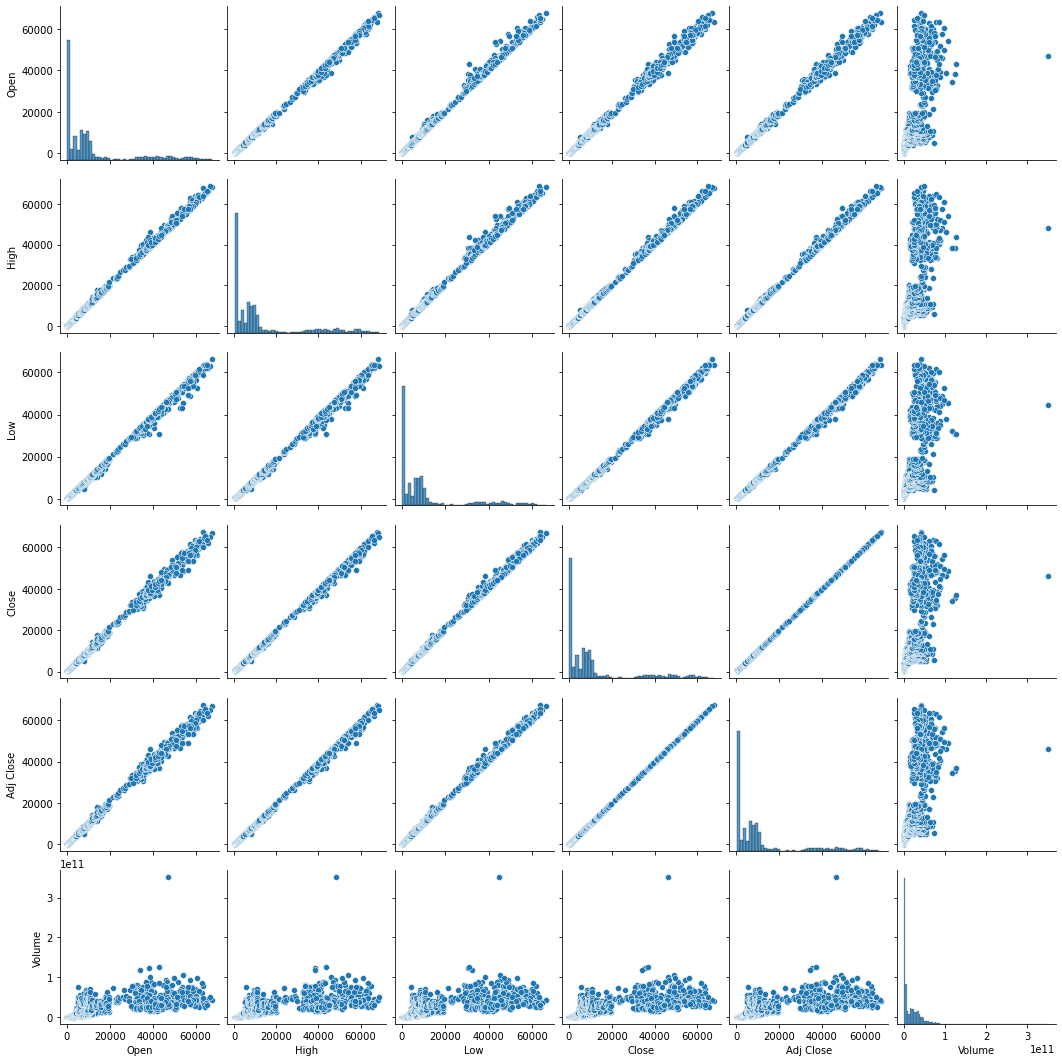

In [14]:
# Ploting pair plot of all columns

sns.pairplot(bit_usd)

<AxesSubplot:>

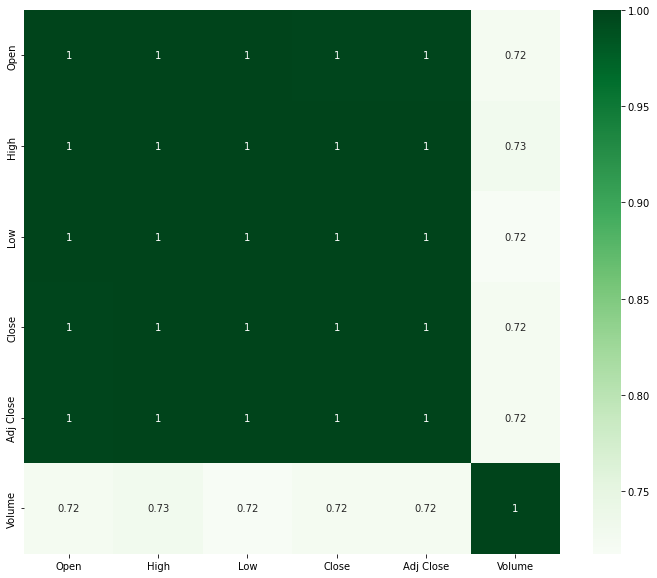

In [15]:
# Ploting heat map of all columns

plt.figure(figsize=(12,10))
sns.heatmap(bit_usd.corr(), cmap='Greens', annot=True)

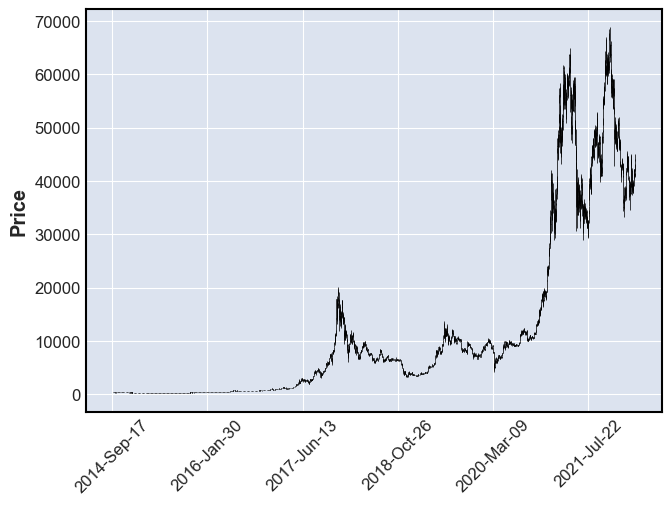

In [16]:
mpf.plot(bit_usd)

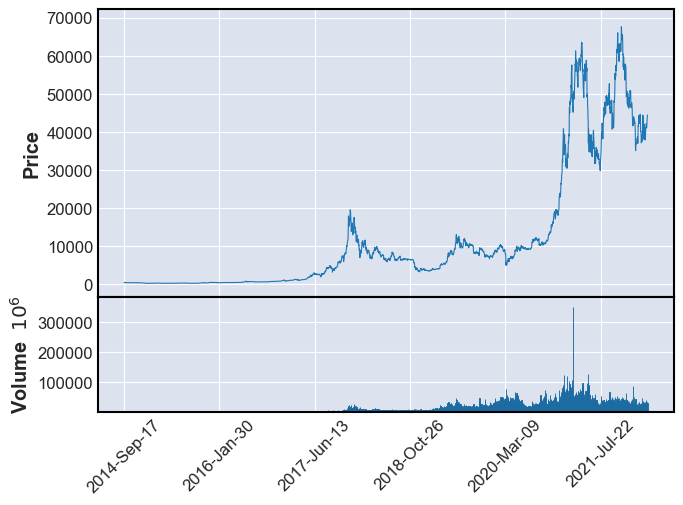

In [17]:
mpf.plot(bit_usd, type='line', volume=True)

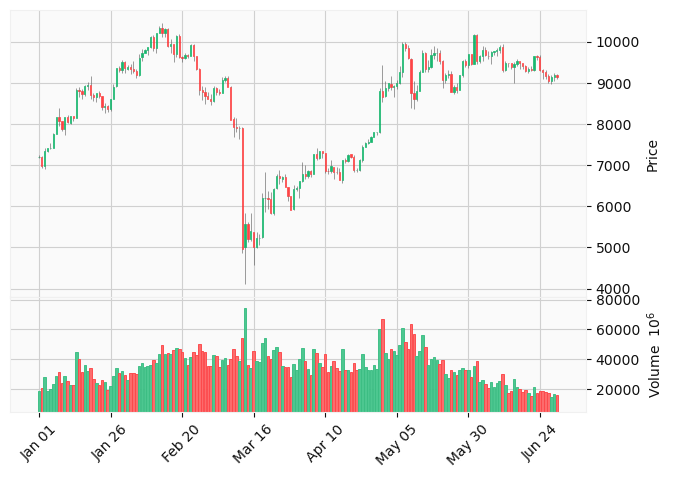

In [18]:
mpf.plot(bit_usd['2020-01':'2020-06'], type='candle', volume=True, style='yahoo')

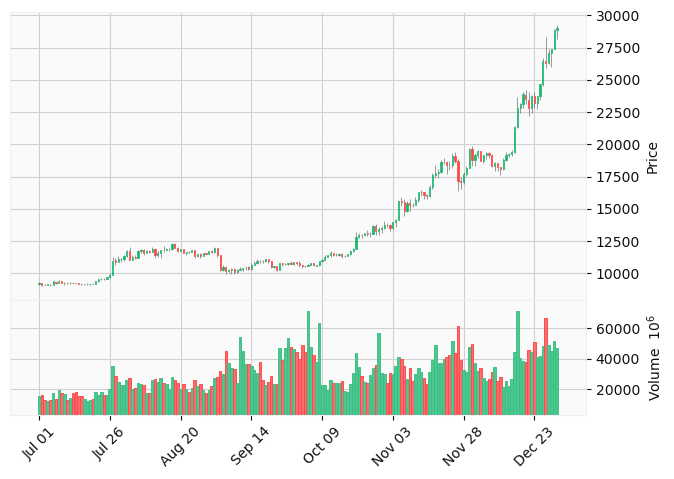

In [19]:
mpf.plot(bit_usd['2020-07':'2020-12'], type='candle', volume=True, style='yahoo')

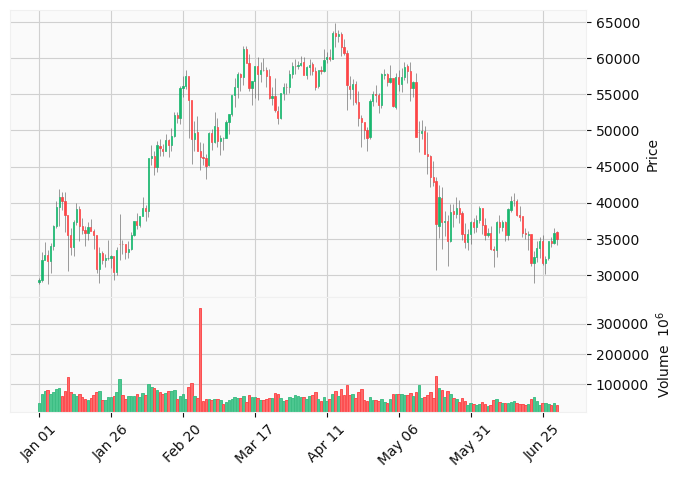

In [20]:
mpf.plot(bit_usd['2021-01':'2021-06'], type='candle', volume=True, style='yahoo')

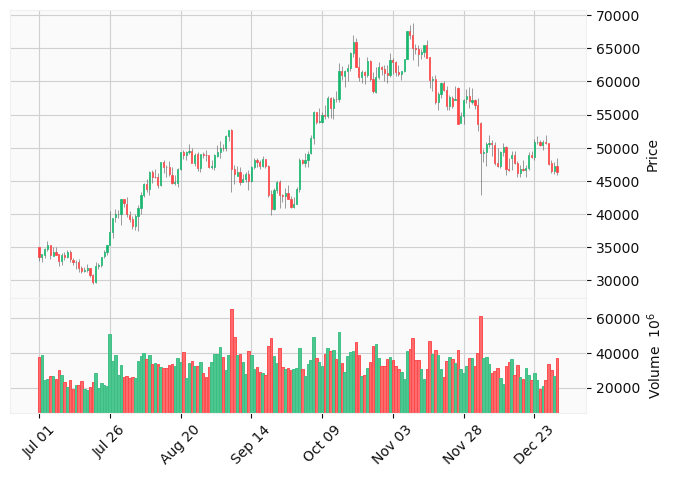

In [21]:
mpf.plot(bit_usd['2021-07':'2021-12'], type='candle', volume=True, style='yahoo')

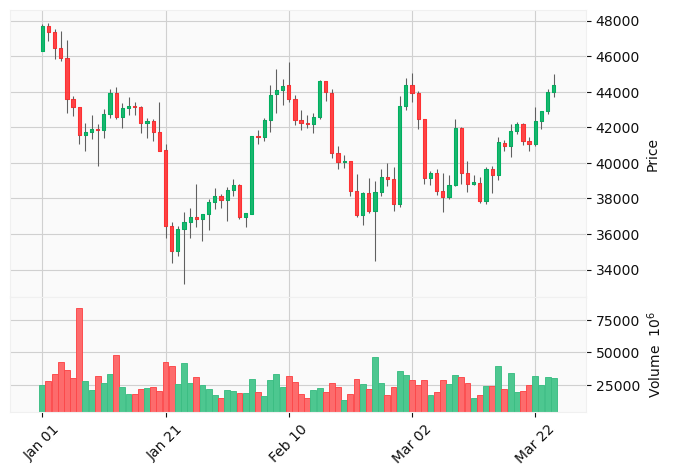

In [22]:
mpf.plot(bit_usd['2022-01':'2022-06'], type='candle', volume=True, style='yahoo')

In [23]:
# keeping necessary coloumns and dropping all other columns

bit_usd = bit_usd[['Adj Close' , 'Volume']]
bit_usd.head()

,Adj Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


<AxesSubplot:xlabel='Adj Close'>

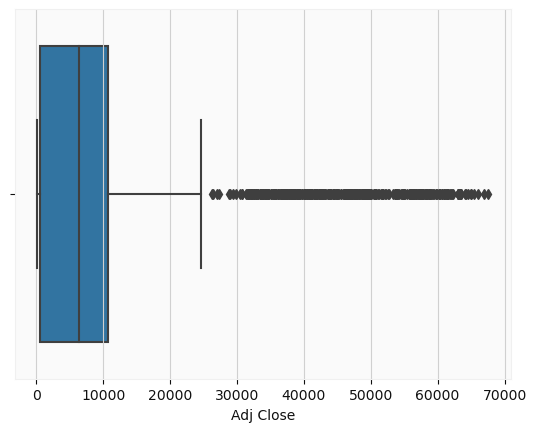

In [24]:
# Boxplot for finding outliers in price

sns.boxplot(bit_usd['Adj Close'])

<AxesSubplot:xlabel='Volume'>

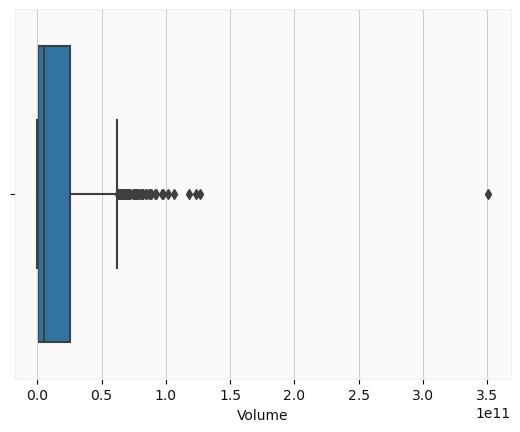

In [25]:
# Boxplot for finding outliers in volume

sns.boxplot(bit_usd['Volume'])

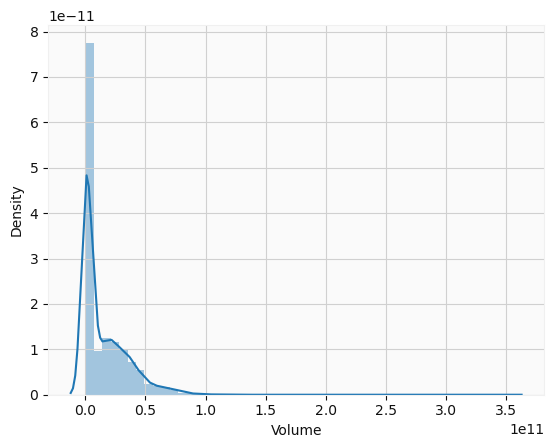

In [26]:
#Plotting the histogram plots of the Volumes of data

sns.distplot(bit_usd.Volume)
plt.show()

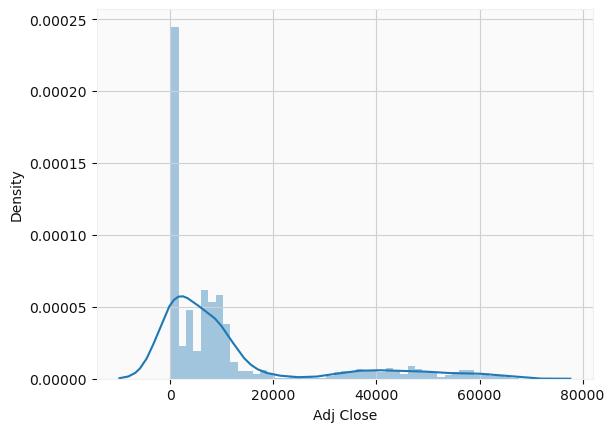

In [27]:
#Plotting the histogram plots of the price of data

sns.distplot(bit_usd['Adj Close'])
plt.show()

<AxesSubplot:xlabel='Date'>

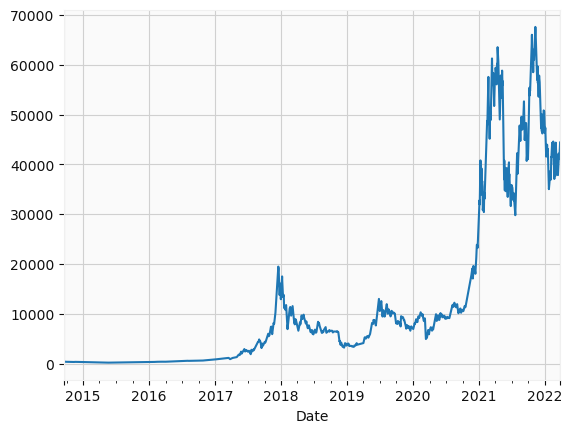

In [28]:
# Line chart of bitcoin price

bit_usd['Adj Close'].plot.line()

<AxesSubplot:xlabel='Date'>

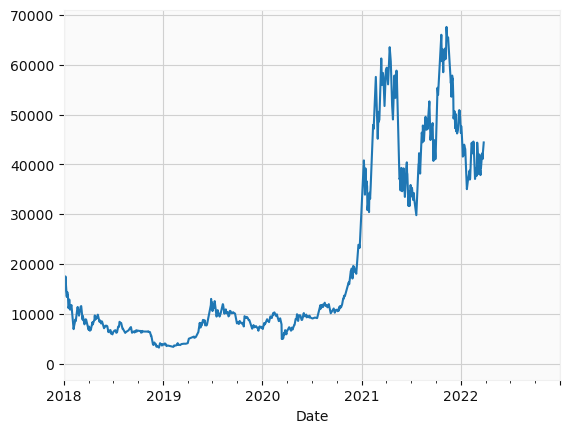

In [29]:
# Line chart of bitcoin price for specific interval

bit_usd['Adj Close'].plot(xlim=['2018-01-01', '2022-12-31'])

<AxesSubplot:xlabel='Date'>

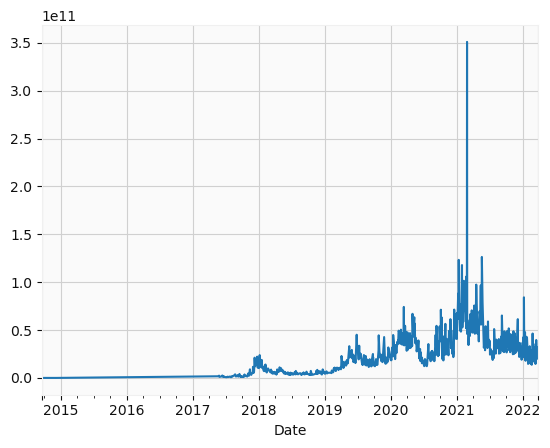

In [30]:
# Line chart of bitcoin volume

bit_usd.Volume.plot.line()

<AxesSubplot:xlabel='Date'>

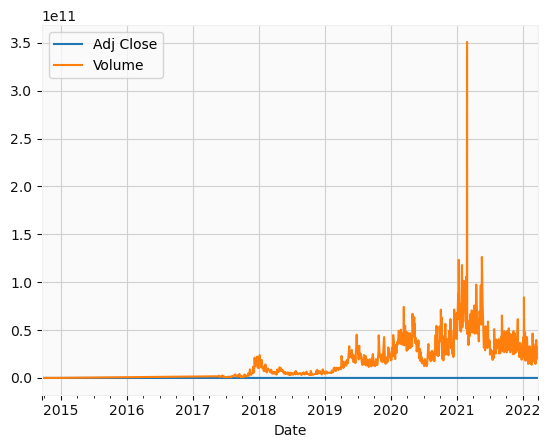

In [31]:
# Plotting bitcoin Prices against volume wthout normalization

bit_usd.plot.line()

In [32]:
norm_vol = bit_usd.Volume/bit_usd.Volume.max()

In [33]:
norm_price = bit_usd['Adj Close']/bit_usd['Adj Close'].max()

In [34]:
# Plotting Normalized bitcoin Prices against volume 

norm_vol_price = pd.concat([norm_price, norm_vol], axis=1)
norm_vol_price.head()

,Adj Close,Volume
Date,,
2014-09-17,0.006769,0.000060
2014-09-18,0.006282,0.000098
2014-09-19,0.005843,0.000108
2014-09-20,0.006052,0.000105
2014-09-21,0.005903,0.000076


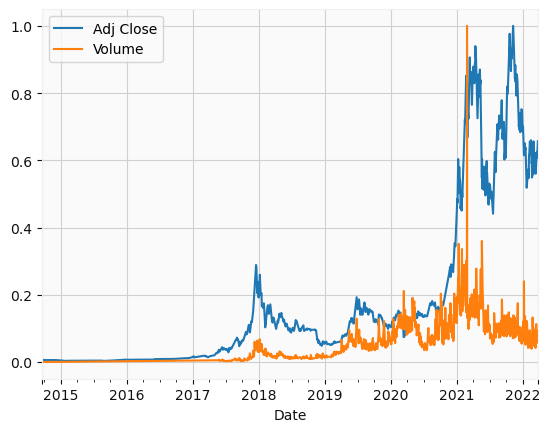

In [35]:
norm_vol_price.plot.line()
plt.show()

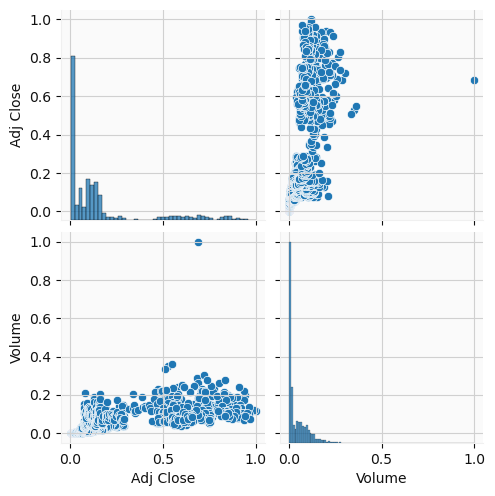

In [36]:
# Scatter plot to find corelation between price & volume

sns.pairplot(norm_vol_price)

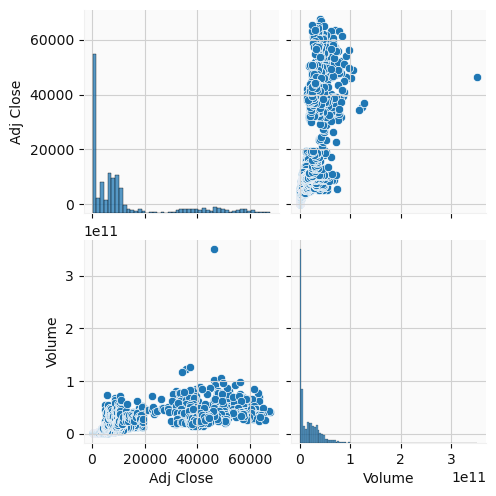

In [37]:
sns.pairplot(bit_usd)

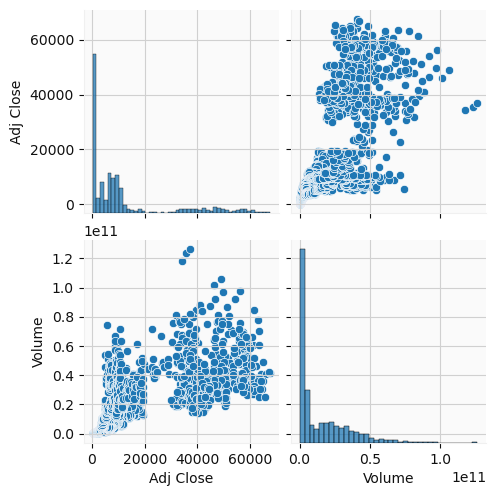

In [38]:
# Corelation after excluding max volume; I treat it as outlier

sns.pairplot(bit_usd[~(bit_usd.Volume == bit_usd.Volume.max())])

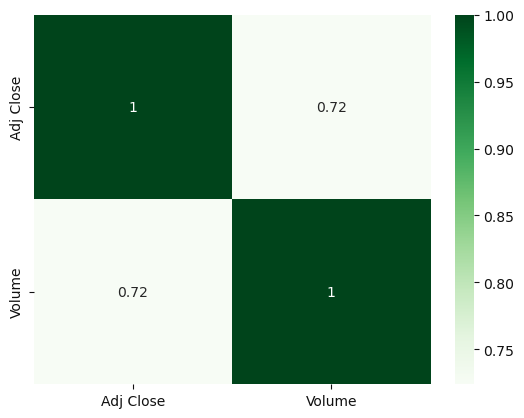

In [39]:
# Heatmap befpore outlier 

sns.heatmap(bit_usd.corr(), cmap="Greens", annot=True)
plt.show()

<AxesSubplot:>

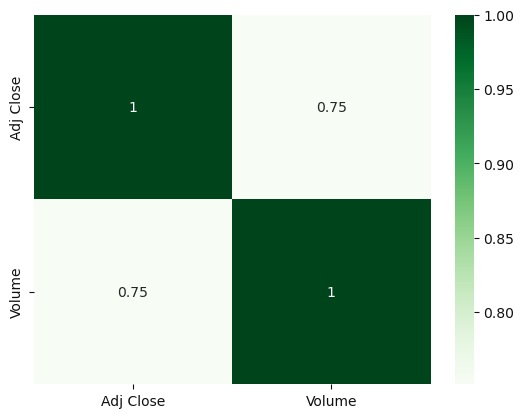

In [40]:
# Heatmap after outlier

sns.heatmap((bit_usd[~(bit_usd.Volume == bit_usd.Volume.max())]).corr(), cmap="Greens", annot=True)

In [41]:
# Averege value of bitcoin per year

(bit_usd['Adj Close']).resample(rule='A').mean()

Date
2014-12-31      363.693085
2015-12-31      272.453381
2016-12-31      568.492407
2017-12-31     4006.033629
2018-12-31     7572.298947
2019-12-31     7395.246282
2020-12-31    11116.378092
2021-12-31    47436.932021
2022-12-31    40933.435361
Freq: A-DEC, Name: Adj Close, dtype: float64

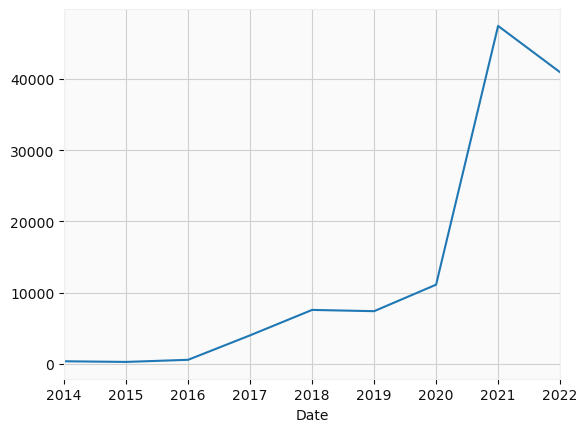

In [42]:
# Yeary line chart 

((bit_usd['Adj Close']).resample(rule='A').mean()).plot()
plt.show()

In [43]:
# Averege value of bitcoin volume per year

(bit_usd['Volume']).resample(rule='A').mean()

Date
2014-12-31    2.383690e+07
2015-12-31    3.390557e+07
2016-12-31    8.592451e+07
2017-12-31    2.382867e+09
2018-12-31    6.063552e+09
2019-12-31    1.673049e+10
2020-12-31    3.302327e+10
2021-12-31    4.715574e+10
2022-12-31    2.679205e+10
Freq: A-DEC, Name: Volume, dtype: float64

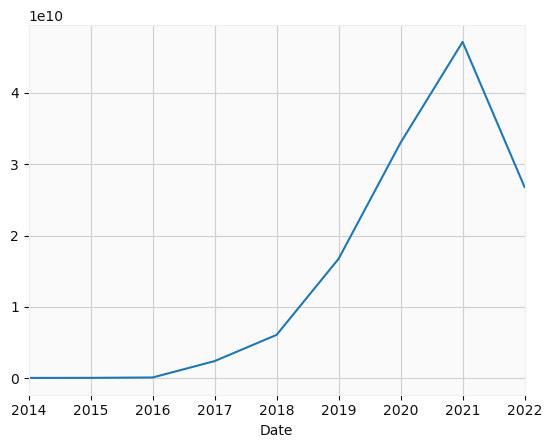

In [44]:
# Yeary line chart of bitcoin volume 

((bit_usd['Volume']).resample(rule='A').mean()).plot()
plt.show()

<AxesSubplot:xlabel='Date'>

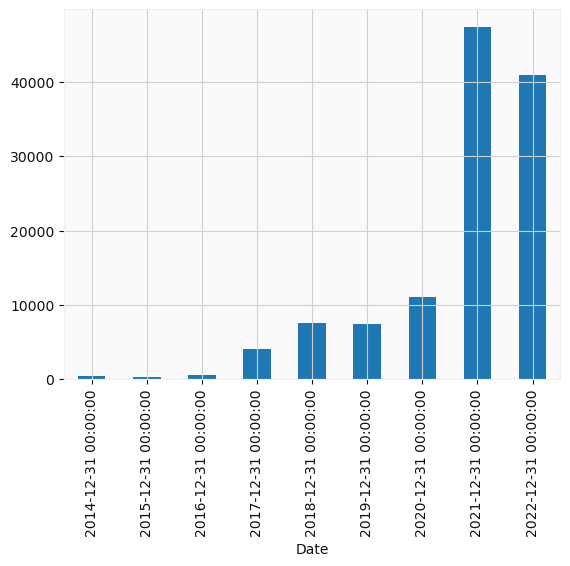

In [45]:
((bit_usd['Adj Close']).resample(rule='A').mean()).plot.bar()

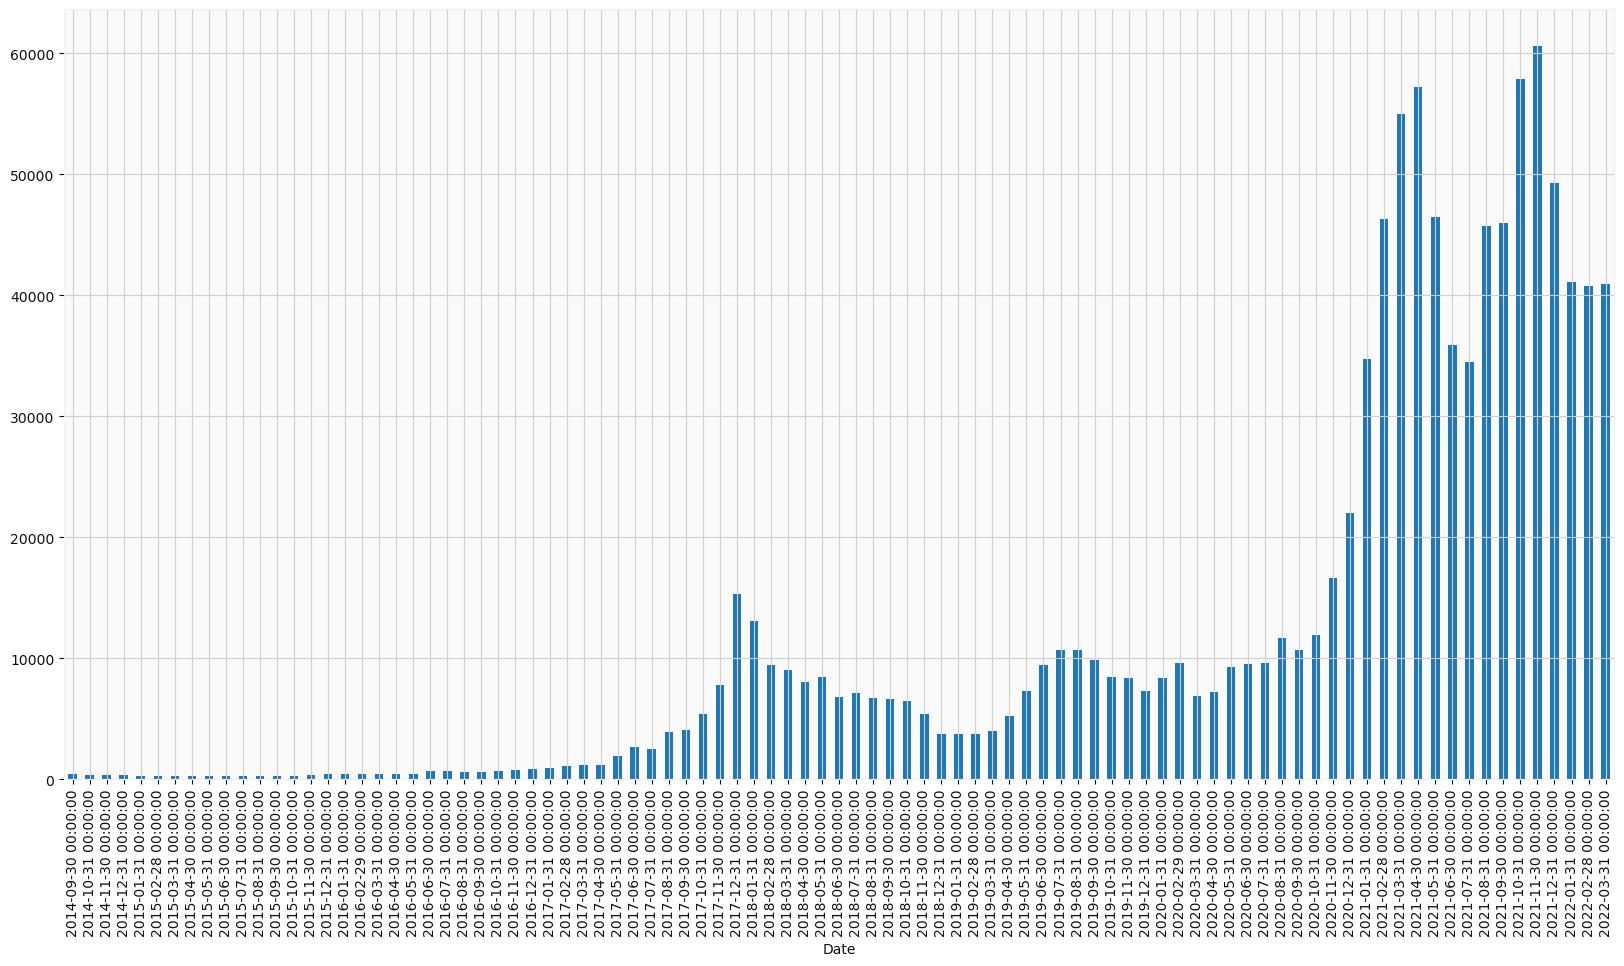

In [46]:
plt.figure(figsize=(20,10))
((bit_usd['Adj Close']).resample(rule='M').mean()).plot.bar()
plt.show()

In [47]:
import statsmodels.api as sms

In [48]:
bit_usd_close = bit_usd['Adj Close']
bit_usd_close.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Adj Close, dtype: float64

In [49]:
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 3. Train Test Split - ARIMA

In [50]:
to_row = int(len(bit_usd_close)*0.8)
to_row

2197

In [51]:
training_data = list(bit_usd_close[:to_row])
training_data

[457.334015,
 424.440002,
 394.79599,
 408.903992,
 398.821014,
 402.152008,
 435.790985,
 423.204987,
 411.574005,
 404.424988,
 399.519989,
 377.181,
 375.46701,
 386.944,
 383.61499,
 375.071991,
 359.511993,
 328.865997,
 320.51001,
 330.07901,
 336.187012,
 352.940002,
 365.026001,
 361.562012,
 362.299011,
 378.549011,
 390.414001,
 400.869995,
 394.77301,
 382.556,
 383.757996,
 391.441986,
 389.54599,
 382.845001,
 386.475006,
 383.15799,
 358.416992,
 358.345001,
 347.270996,
 354.70401,
 352.989014,
 357.618011,
 335.591003,
 345.304993,
 338.321014,
 325.748993,
 325.891998,
 327.553986,
 330.492004,
 339.485992,
 349.290009,
 342.415009,
 345.488007,
 363.264008,
 366.924011,
 367.695007,
 423.561005,
 420.734985,
 397.817993,
 376.132996,
 387.881989,
 387.40799,
 375.197998,
 380.554993,
 357.839996,
 350.847992,
 352.920013,
 367.572998,
 376.901001,
 375.347992,
 368.369995,
 369.670013,
 376.446991,
 375.490997,
 378.046997,
 379.244995,
 381.315002,
 375.01001,
 369.6

In [52]:
len(training_data)

2197

In [53]:
testing_data = list(bit_usd_close[to_row:])
testing_data

[10538.459961,
 10246.186523,
 10760.066406,
 10692.716797,
 10750.723633,
 10775.269531,
 10709.652344,
 10844.640625,
 10784.491211,
 10619.452148,
 10575.974609,
 10549.329102,
 10669.583008,
 10793.339844,
 10604.40625,
 10668.96875,
 10915.685547,
 11064.458008,
 11296.361328,
 11384.181641,
 11555.363281,
 11425.899414,
 11429.506836,
 11495.349609,
 11322.123047,
 11358.101563,
 11483.359375,
 11742.037109,
 11916.334961,
 12823.689453,
 12965.891602,
 12931.539063,
 13108.0625,
 13031.173828,
 13075.248047,
 13654.21875,
 13271.285156,
 13437.882813,
 13546.522461,
 13780.995117,
 13737.109375,
 13550.489258,
 13950.300781,
 14133.707031,
 15579.848633,
 15565.880859,
 14833.753906,
 15479.567383,
 15332.31543,
 15290.902344,
 15701.339844,
 16276.34375,
 16317.808594,
 16068.138672,
 15955.587891,
 16716.111328,
 17645.40625,
 17804.005859,
 17817.089844,
 18621.314453,
 18642.232422,
 18370.001953,
 18364.121094,
 19107.464844,
 18732.121094,
 17150.623047,
 17108.402344,
 17

In [54]:
len(testing_data)

550

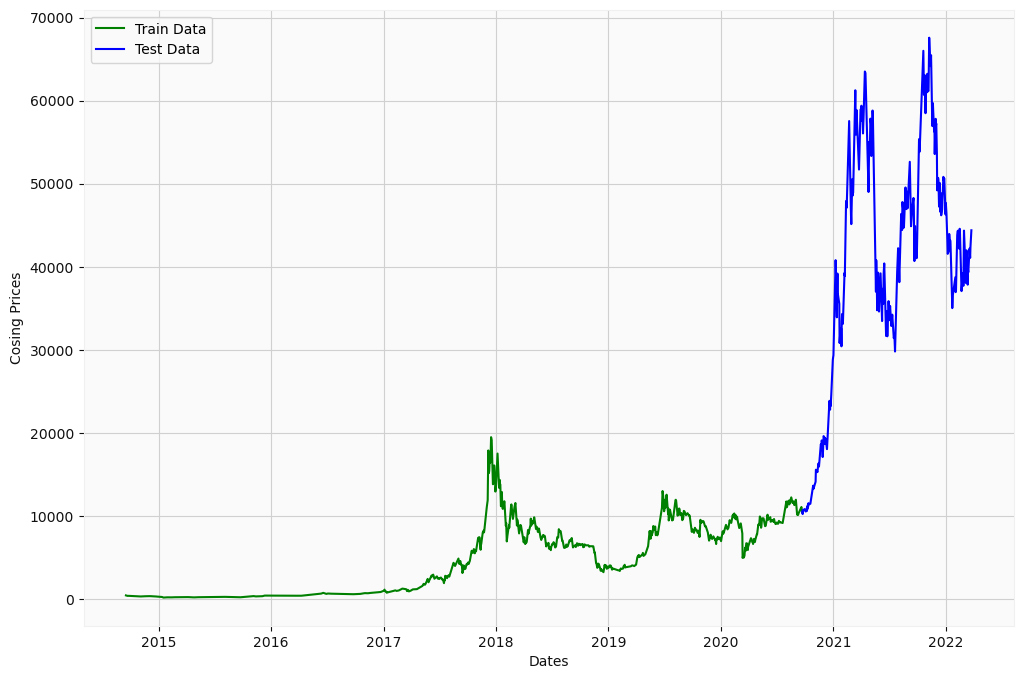

In [55]:
# split data into train and test with plot

plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Cosing Prices')
plt.plot(bit_usd_close[0:to_row], 'green', label='Train Data')
plt.plot(bit_usd_close[to_row:], 'blue', label='Test Data')
plt.legend()
plt.show()

# 4. ARIMA MODEL BUILDING

In [56]:
model_prediction = []
n_test_obs = len(testing_data)


In [57]:
for i in range(n_test_obs):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    model_prediction.append(output[0])
    training_data.append(testing_data[i])
    #print(output[0])
    #break

In [58]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2746
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22204.217
Date:                Fri, 15 Mar 2024   AIC                          44418.434
Time:                        08:47:47   BIC                          44448.022
Sample:                             0   HQIC                         44429.125
                               - 2746                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0238      0.010     -2.465      0.014      -0.043      -0.005
ar.L2         -0.0043      0.009     -0.475      0.635      -0.022       0.014
ar.L3          0.0094      0.010      0.963      0.3

# 5. ARIMA MODEL EVALUATION

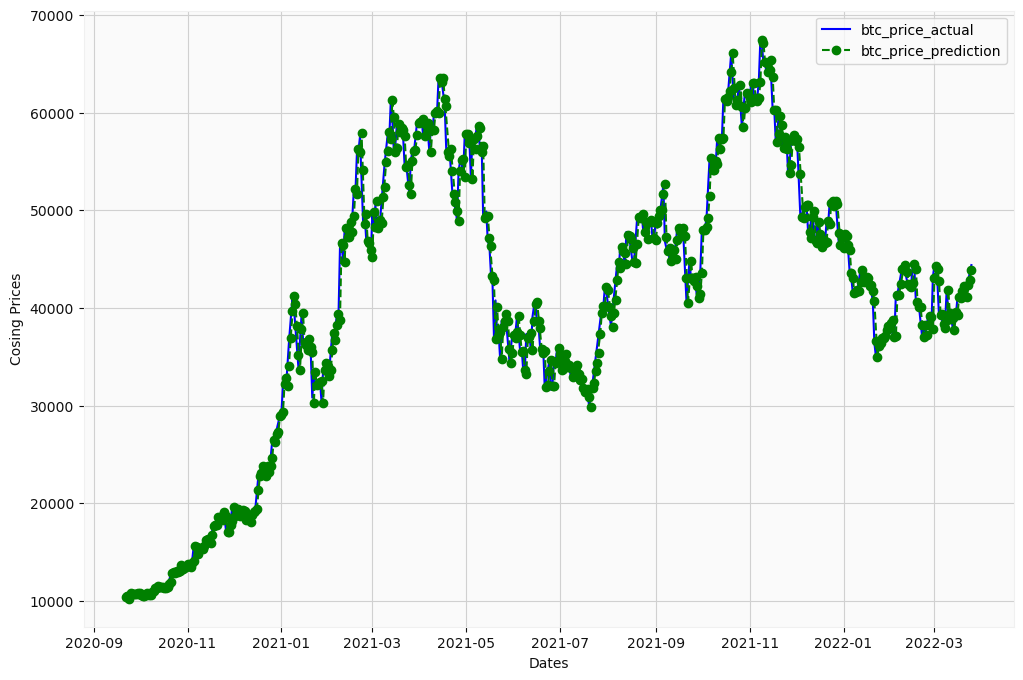

In [65]:
# Ploting prediction and actual bitcoin price

plt.figure(figsize=(12,8))
plt.grid(True)
dates = bit_usd_close[to_row:].index
plt.plot(dates, testing_data, color = 'blue', label = 'btc_price_actual')
plt.plot(dates, model_prediction, color = 'green', label = 'btc_price_prediction', marker = 'o', linestyle = 'dashed')
plt.xlabel('Dates')
plt.ylabel('Cosing Prices')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [73]:
MeanAbsErrorARIMA = mean_absolute_error(testing_data, model_prediction)
MeanAbsErrorARIMA

1178.4904637655434

In [74]:
MeanAbsPerErrorARIMA = mean_absolute_percentage_error(testing_data, model_prediction)
MeanAbsErr

0.02864373927280251

In [75]:
MeanSquErrorARIMA = mean_squared_error(testing_data, model_prediction)
MeanSquErrorARIMA

2830220.9169848687

In [77]:
RootMeanSquErrorARIMA = np.sqrt(MeanSquErrorARIMA)
RootMeanSquErrorARIMA

1682.3260436029839

In [76]:
R2ScoreARIMA = r2_score(testing_data, model_prediction)
R2ScoreARIMA

0.9864205692245959

In [81]:
len(testing_data)

550

In [82]:
len(model_prediction)

550

# 6 Train Test Split - LSTM 

In [83]:
bit_usd_lstm = pd.read_csv('BTC-USD.csv')
bit_usd_lstm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [84]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [85]:
bit_usd_lstm_train = bit_usd_lstm[:to_row]
bit_usd_lstm_test = bit_usd_lstm[to_row:]

In [86]:
bit_usd_lstm_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [87]:
bit_usd_lstm_train.shape

(2197, 7)

In [88]:
bit_usd_lstm_test.shape

(550, 7)

# 7. Scale the Data Using MinMaxScaler

In [89]:
# reshaping of the data from series(one D) to two Dimention

bit_usd_lstm_train['Adj Close'].values.reshape(-1,1).shape

(2197, 1)

In [90]:
scaler = MinMaxScaler(feature_range=(0,1))
bit_usd_lstm_train_scaled = scaler.fit_transform(bit_usd_lstm_train['Adj Close'].values.reshape(-1,1))

In [91]:
bit_usd_lstm_train_scaled

array([[0.01445348],
       [0.01275083],
       [0.0112164 ],
       ...,
       [0.56504351],
       [0.55696479],
       [0.53232561]])

In [92]:
bit_usd_lstm_train_scaled.shape

(2197, 1)

In [93]:
len(bit_usd_lstm_train_scaled)

2197

# 8. LSTM Model Building

In [94]:
train_int = 60
prediction_int = 1
x_train = []
y_train = []

In [95]:
for i in range(train_int, len(bit_usd_lstm_train_scaled)-prediction_int):
    x_train.append(bit_usd_lstm_train_scaled[i-train_int:i , 0])
    y_train.append(bit_usd_lstm_train_scaled[i-prediction_int , 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [96]:
x_train

array([[0.01445348, 0.01275083, 0.0112164 , ..., 0.01255905, 0.01137283,
        0.01025037],
       [0.01275083, 0.0112164 , 0.01194666, ..., 0.01137283, 0.01025037,
        0.01085852],
       [0.0112164 , 0.01194666, 0.01142474, ..., 0.01025037, 0.01085852,
        0.01083399],
       ...,
       [0.46513744, 0.47604136, 0.48383024, ..., 0.54964981, 0.55886102,
        0.55751961],
       [0.47604136, 0.48383024, 0.48671383, ..., 0.55886102, 0.55751961,
        0.55729164],
       [0.48383024, 0.48671383, 0.48442702, ..., 0.55751961, 0.55729164,
        0.56504351]])

In [97]:
x_train.shape

(2136, 60)

In [98]:
y_train

array([0.01025037, 0.01085852, 0.01083399, ..., 0.55751961, 0.55729164,
       0.56504351])

In [99]:
y_train.shape

(2136,)

In [100]:
to_row = int(len(bit_usd_close)*0.8)
to_row

2197

In [101]:
x_train.shape

(2136, 60)

In [102]:
# reshape x_train to 3 Dimention

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.01445348],
        [0.01275083],
        [0.0112164 ],
        ...,
        [0.01255905],
        [0.01137283],
        [0.01025037]],

       [[0.01275083],
        [0.0112164 ],
        [0.01194666],
        ...,
        [0.01137283],
        [0.01025037],
        [0.01085852]],

       [[0.0112164 ],
        [0.01194666],
        [0.01142474],
        ...,
        [0.01025037],
        [0.01085852],
        [0.01083399]],

       ...,

       [[0.46513744],
        [0.47604136],
        [0.48383024],
        ...,
        [0.54964981],
        [0.55886102],
        [0.55751961]],

       [[0.47604136],
        [0.48383024],
        [0.48671383],
        ...,
        [0.55886102],
        [0.55751961],
        [0.55729164]],

       [[0.48383024],
        [0.48671383],
        [0.48442702],
        ...,
        [0.55751961],
        [0.55729164],
        [0.56504351]]])

In [103]:
x_train.shape

(2136, 60, 1)

In [104]:
x_train.shape[1],1

(60, 1)

In [105]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1], 1), activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences=True, activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [106]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [107]:
model.fit(x_train, y_train, epochs=10, batch_size= 64)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 6.9458e-04 - loss: 0.1029
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 1.6641e-04 - loss: 0.0073
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.0011 - loss: 0.0034
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.0016 - loss: 0.0029
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.0019 - loss: 0.0024
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 4.5040e-04 - loss: 0.0024
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 6.5781e-04 - loss: 0.0019
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 7.1711e-04 - loss: 0.0019
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 8.0316e-04 - loss: 0.0018
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 6.5712e-04 - loss: 0.0017


In [114]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385,253 (1.47 MB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,836 (1003.27 KB)

In [108]:
bit_usd_lstm_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2197,2020-09-22,10459.624023,10568.077148,10382.726563,10538.459961,10538.459961,23621787804
2198,2020-09-23,10535.492188,10537.828125,10197.865234,10246.186523,10246.186523,23788661867
2199,2020-09-24,10248.786133,10771.056641,10231.490234,10760.066406,10760.066406,47144380902
2200,2020-09-25,10761.109375,10777.696289,10578.914063,10692.716797,10692.716797,39348590957
2201,2020-09-26,10695.575195,10772.999023,10667.281250,10750.723633,10750.723633,46852525493


In [109]:
bit_usd_actual = bit_usd_lstm_test['Adj Close'].values
bit_usd_actual

array([10538.459961, 10246.186523, 10760.066406, 10692.716797,
       10750.723633, 10775.269531, 10709.652344, 10844.640625,
       10784.491211, 10619.452148, 10575.974609, 10549.329102,
       10669.583008, 10793.339844, 10604.40625 , 10668.96875 ,
       10915.685547, 11064.458008, 11296.361328, 11384.181641,
       11555.363281, 11425.899414, 11429.506836, 11495.349609,
       11322.123047, 11358.101563, 11483.359375, 11742.037109,
       11916.334961, 12823.689453, 12965.891602, 12931.539063,
       13108.0625  , 13031.173828, 13075.248047, 13654.21875 ,
       13271.285156, 13437.882813, 13546.522461, 13780.995117,
       13737.109375, 13550.489258, 13950.300781, 14133.707031,
       15579.848633, 15565.880859, 14833.753906, 15479.567383,
       15332.31543 , 15290.902344, 15701.339844, 16276.34375 ,
       16317.808594, 16068.138672, 15955.587891, 16716.111328,
       17645.40625 , 17804.005859, 17817.089844, 18621.314453,
       18642.232422, 18370.001953, 18364.121094, 19107.

In [110]:
lstm_test = bit_usd_lstm_test['Adj Close'].values
lstm_test = lstm_test.reshape(-1,1)
lstm_test_m = scaler.fit_transform(lstm_test)

In [111]:
lstm_test_m

array([[0.00509892],
       [0.        ],
       [0.00896501],
       [0.00779004],
       [0.00880201],
       [0.00923024],
       [0.0080855 ],
       [0.01044046],
       [0.00939111],
       [0.00651189],
       [0.00575339],
       [0.00528854],
       [0.00738646],
       [0.00954548],
       [0.0062494 ],
       [0.00737574],
       [0.01167989],
       [0.01427534],
       [0.01832106],
       [0.01985315],
       [0.02283953],
       [0.02058094],
       [0.02064388],
       [0.02179255],
       [0.01877049],
       [0.01939816],
       [0.02158337],
       [0.02609619],
       [0.02913695],
       [0.0449664 ],
       [0.04744722],
       [0.04684791],
       [0.04992749],
       [0.04858612],
       [0.04935502],
       [0.05945558],
       [0.05277503],
       [0.05568145],
       [0.05757674],
       [0.06166729],
       [0.06090167],
       [0.05764595],
       [0.06462095],
       [0.0678206 ],
       [0.09304959],
       [0.09280591],
       [0.08003343],
       [0.091

In [112]:
lstm_test_m.shape

(550, 1)

# 9. LSTM Model Evaluation

In [115]:
x_test = []
for x in range(train_int, len(lstm_test_m)):
    x_test.append(lstm_test_m[x-train_int:x , 0])
x_test = np.array(x_test)

In [116]:
x_test

array([[0.00509892, 0.        , 0.00896501, ..., 0.13185162, 0.13207988,
        0.14611016],
       [0.        , 0.00896501, 0.00779004, ..., 0.13207988, 0.14611016,
        0.14647509],
       [0.00896501, 0.00779004, 0.00880201, ..., 0.14611016, 0.14647509,
        0.14172583],
       ...,
       [0.43237589, 0.45412294, 0.46070911, ..., 0.54084596, 0.53788319,
        0.56022789],
       [0.45412294, 0.46070911, 0.46593717, ..., 0.53788319, 0.56022789,
        0.56954649],
       [0.46070911, 0.46593717, 0.46415975, ..., 0.56022789, 0.56954649,
        0.58817812]])

In [117]:
x_test.shape

(490, 60)

In [118]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(490, 60, 1)

In [119]:
x_test

array([[[0.00509892],
        [0.        ],
        [0.00896501],
        ...,
        [0.13185162],
        [0.13207988],
        [0.14611016]],

       [[0.        ],
        [0.00896501],
        [0.00779004],
        ...,
        [0.13207988],
        [0.14611016],
        [0.14647509]],

       [[0.00896501],
        [0.00779004],
        [0.00880201],
        ...,
        [0.14611016],
        [0.14647509],
        [0.14172583]],

       ...,

       [[0.43237589],
        [0.45412294],
        [0.46070911],
        ...,
        [0.54084596],
        [0.53788319],
        [0.56022789]],

       [[0.45412294],
        [0.46070911],
        [0.46593717],
        ...,
        [0.53788319],
        [0.56022789],
        [0.56954649]],

       [[0.46070911],
        [0.46593717],
        [0.46415975],
        ...,
        [0.56022789],
        [0.56954649],
        [0.58817812]]])

In [120]:
bit_usd_predicted = model.predict(x_test)
bit_usd_predicted

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


array([[0.0423425 ],
       [0.0459572 ],
       [0.04978782],
       [0.05378297],
       [0.05796459],
       [0.06230655],
       [0.06672611],
       [0.07115582],
       [0.07554188],
       [0.07987307],
       [0.08418442],
       [0.08845409],
       [0.09266035],
       [0.09679244],
       [0.10078714],
       [0.10466677],
       [0.10840991],
       [0.11198705],
       [0.11534334],
       [0.11842994],
       [0.12125242],
       [0.12379175],
       [0.1261067 ],
       [0.1282283 ],
       [0.13018027],
       [0.13199629],
       [0.13381942],
       [0.1358106 ],
       [0.13805896],
       [0.14067447],
       [0.14365001],
       [0.14694333],
       [0.15057495],
       [0.15448284],
       [0.15867297],
       [0.16319178],
       [0.1682271 ],
       [0.17380989],
       [0.18003169],
       [0.18695784],
       [0.19473056],
       [0.20343083],
       [0.21317473],
       [0.22460636],
       [0.23807487],
       [0.25328767],
       [0.27036905],
       [0.290

In [121]:
bit_usd_predicted.shape

(490, 1)

In [122]:
bit_usd_predicted = scaler.inverse_transform(bit_usd_predicted)
bit_usd_predicted

array([[12673.286 ],
       [12880.482 ],
       [13100.057 ],
       [13329.061 ],
       [13568.754 ],
       [13817.638 ],
       [14070.971 ],
       [14324.884 ],
       [14576.296 ],
       [14824.5625],
       [15071.69  ],
       [15316.432 ],
       [15557.536 ],
       [15794.393 ],
       [16023.369 ],
       [16245.753 ],
       [16460.312 ],
       [16665.355 ],
       [16857.74  ],
       [17034.666 ],
       [17196.453 ],
       [17342.01  ],
       [17474.703 ],
       [17596.314 ],
       [17708.203 ],
       [17812.299 ],
       [17916.803 ],
       [18030.938 ],
       [18159.814 ],
       [18309.738 ],
       [18480.299 ],
       [18669.072 ],
       [18877.24  ],
       [19101.242 ],
       [19341.424 ],
       [19600.445 ],
       [19889.072 ],
       [20209.08  ],
       [20565.719 ],
       [20962.73  ],
       [21408.268 ],
       [21906.973 ],
       [22465.498 ],
       [23120.768 ],
       [23892.791 ],
       [24764.799 ],
       [25743.914 ],
       [26873

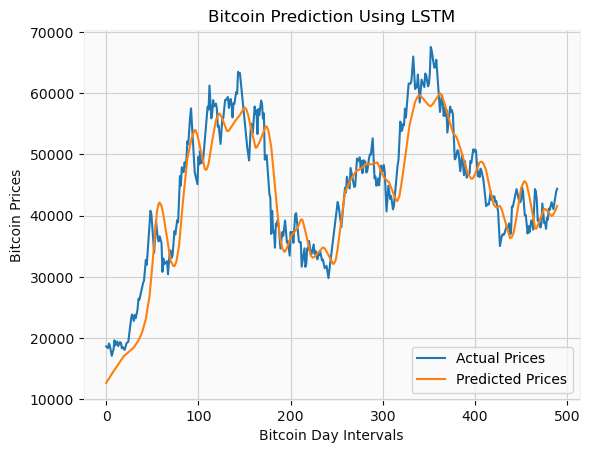

In [123]:
plt.plot(bit_usd_actual[60:], label = 'Actual Prices')
plt.plot(bit_usd_predicted, label = 'Predicted Prices')
plt.title('Bitcoin Prediction Using LSTM')
plt.xlabel('Bitcoin Day Intervals')
plt.ylabel('Bitcoin Prices')
plt.legend()
plt.show()

In [266]:
bit_usd_actual.shape

(550,)

In [268]:
bit_usd_predicted.shape

(490, 1)

In [125]:
bit_usd_actual = bit_usd_actual[60:]
bit_usd_actual.shape

(490,)

In [126]:
bit_usd_predicted = bit_usd_predicted.reshape(-1,)
bit_usd_predicted.shape

(490,)

In [127]:
MeanAbsErrorLSTM = mean_absolute_error(bit_usd_actual, bit_usd_predicted)
MeanAbsErrorLSTM

3530.323419604719

In [128]:
MeanAbsPerErrorLSTM = mean_absolute_percentage_error(bit_usd_actual, bit_usd_predicted)
MeanAbsPerErrorLSTM

0.08704549005583799

In [129]:
MeanSquErrorLSTM = mean_squared_error(bit_usd_actual, bit_usd_predicted)
MeanSquErrorLSTM

19538224.12531414

In [130]:
RootMeanSquErrorLSTM = np.sqrt(MeanSquErrorLSTM)
RootMeanSquErrorLSTM

4420.2063442009285

In [131]:
R2ScoreLSTM = r2_score(bit_usd_actual, bit_usd_predicted)
R2ScoreLSTM

0.8470809759379778

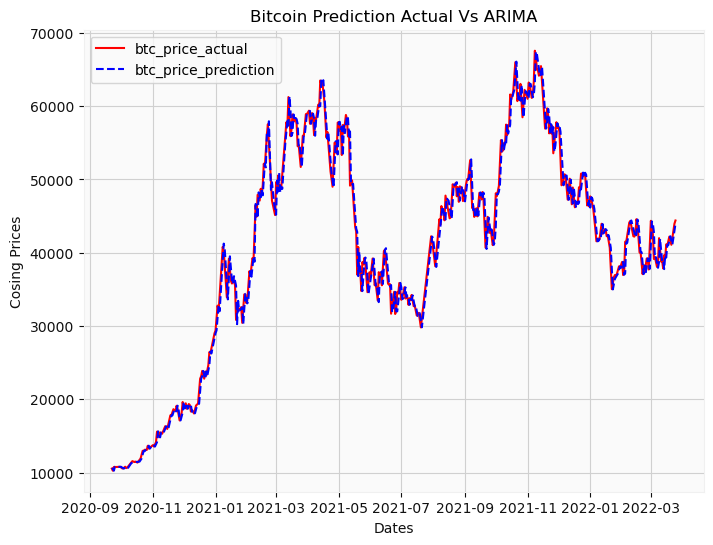

In [151]:
plt.figure(figsize=(8,6))
dates = bit_usd_close[to_row:].index
plt.plot(dates, testing_data, color = 'red', label = 'btc_price_actual')
plt.plot(dates, model_prediction, color = 'blue', label = 'btc_price_prediction', linestyle = 'dashed')
plt.title('Bitcoin Prediction Actual Vs ARIMA')
plt.xlabel('Dates')
plt.ylabel('Cosing Prices')
plt.legend()
plt.show()

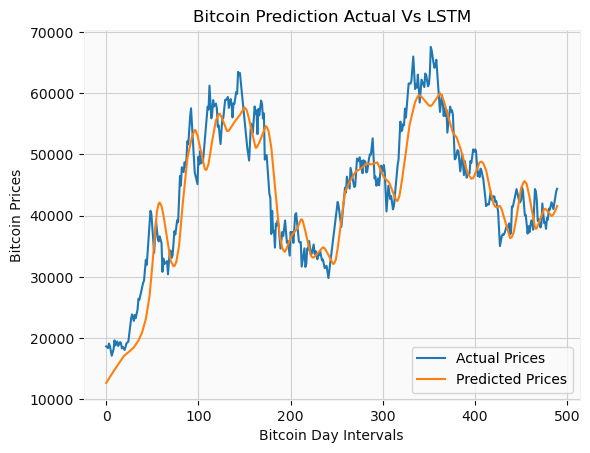

In [153]:
plt.plot(bit_usd_actual, label = 'Actual Prices')
plt.plot(bit_usd_predicted, label = 'Predicted Prices')
plt.title('Bitcoin Prediction Actual Vs LSTM')
plt.xlabel('Bitcoin Day Intervals')
plt.ylabel('Bitcoin Prices')
plt.legend()
plt.show()

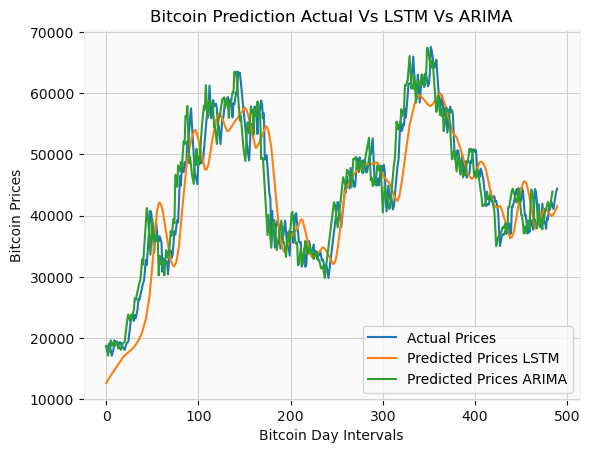

In [138]:
plt.plot(bit_usd_actual, label = 'Actual Prices')
plt.plot(bit_usd_predicted, label = 'Predicted Prices LSTM')
plt.plot(model_prediction[65:], label = 'Predicted Prices ARIMA')
plt.title('Bitcoin Prediction Actual Vs LSTM Vs ARIMA')
plt.xlabel('Bitcoin Day Intervals')
plt.ylabel('Bitcoin Prices')
plt.legend()
plt.show()

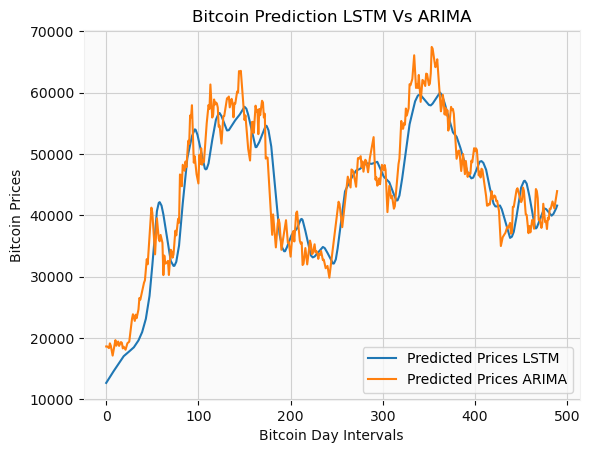

In [139]:
plt.plot(bit_usd_predicted, label = 'Predicted Prices LSTM')
plt.plot(model_prediction[60:], label = 'Predicted Prices ARIMA')
plt.title('Bitcoin Prediction LSTM Vs ARIMA')
plt.xlabel('Bitcoin Day Intervals')
plt.ylabel('Bitcoin Prices')
plt.legend()
plt.show()

In [134]:
len(model_prediction[60:])

490